## Importing libraries that will be used in this notebook

In [56]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
from sklearn import datasets


# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')
    
import os
from sklearn.metrics import r2_score

import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import silhouette_score

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

<IPython.core.display.Javascript object>

## Loading Iris Dataset

In [7]:
iris = datasets.load_iris()

df_x = iris.data
df_y = iris.target

### Coverting np.array to dataframe

In [10]:
iris = pd.DataFrame(df_x, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris['species'] = df_y
target = iris['species']
X = pd.DataFrame(df_x, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Determining the number of rows and columns

In [12]:
iris.shape

(150, 5)

### summary of all the numeric columns in the dataset

In [206]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Checking Missing Values

In [16]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Checking Unique Values of Target

In [18]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [20]:
listt = [x for x in range(1,151)]
index = pd.DataFrame(listt)
iris['ID'] = index
tmp = iris.drop('ID', axis=1)

## Data Visualization

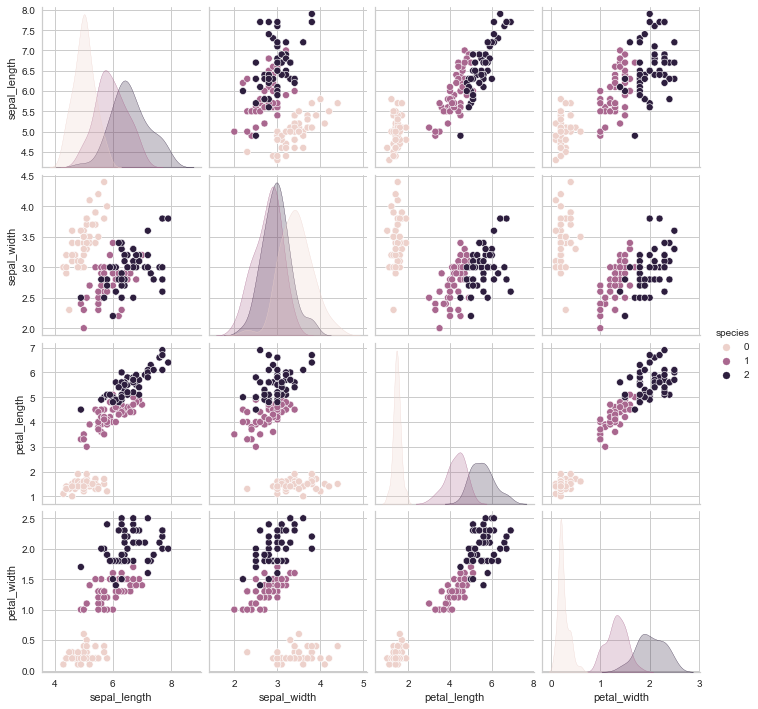

In [21]:
overal_view = sns.pairplot(tmp, hue= 'species')
plt.show()

## Plotting The Frequency of The Observation

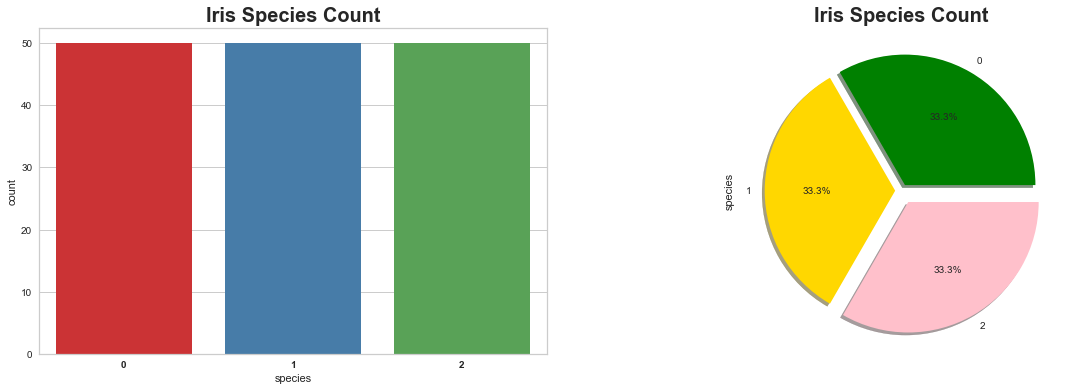

In [32]:
plt.figure(figsize=(20, 6))
cols = ['green', 'gold','pink']
plt.subplot(1,2,1)
sns.countplot('species',data=iris, palette='Set1')
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.subplot(1,2,2)
iris['species'].value_counts().plot.pie(explode=[0.05,0.05,0.1],autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Iris Species Count',fontweight="bold", size=20)
plt.xticks(fontweight="bold")
plt.show()

## Jointplot

<Figure size 864x720 with 0 Axes>

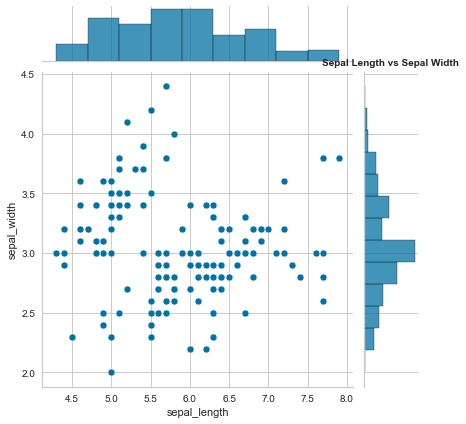

In [34]:
plt.figure(figsize=(12,10))
sns.jointplot(x='sepal_length',y='sepal_width',data=iris)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=10)
plt.show()

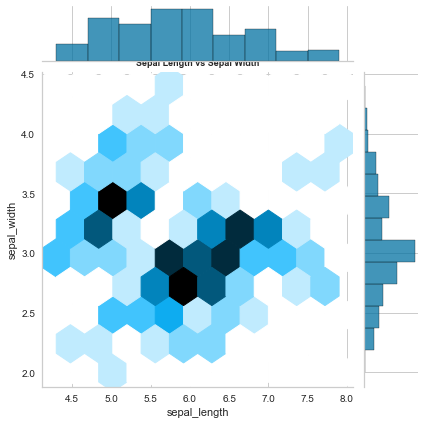

In [35]:
fig=sns.jointplot(x='sepal_length',y='sepal_width',kind='hex',data=iris)
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=9)
plt.show()

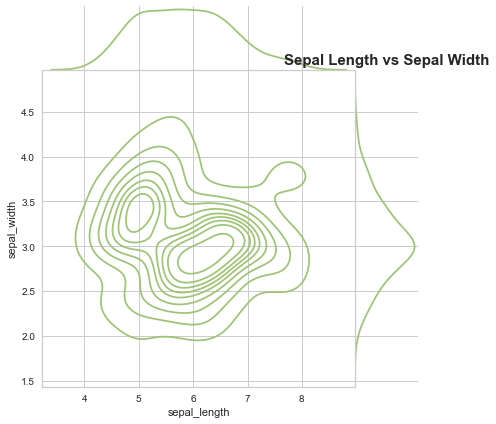

In [40]:
sns.jointplot('sepal_length','sepal_width', data=iris, kind="kde",space=0,color='g')
plt.title('Sepal Length vs Sepal Width',fontweight="bold", size=15)
plt.show()

### Visualizing The Data - scatter plots based on Sepal and Petal width and length

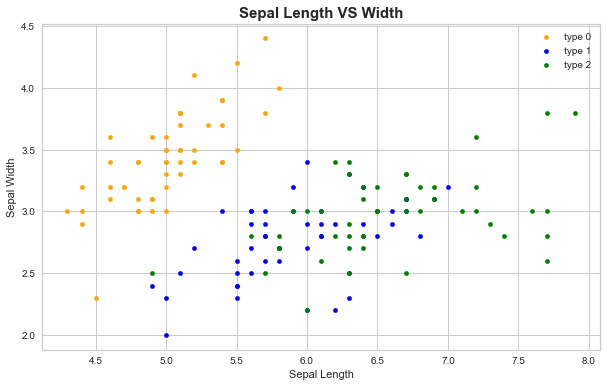

In [39]:
fig = iris[iris.species== 0].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='type 0')
iris[iris.species== 1].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='type 1',ax=fig)
iris[iris.species== 2].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='type 2', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width", fontweight='bold',size=15)
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

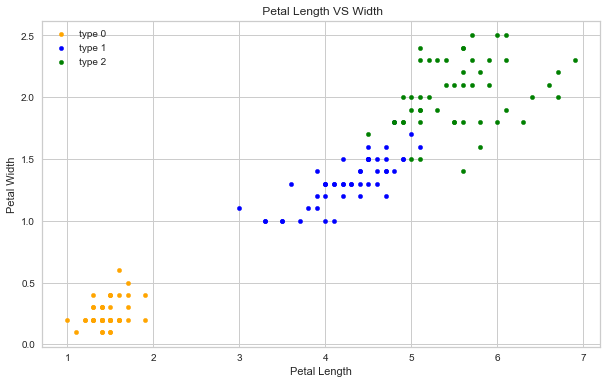

In [41]:
fig =iris[iris.species== 0].plot.scatter(x='petal_length',y='petal_width',color='orange', label='type 0')
iris[iris.species==1].plot.scatter(x='petal_length',y='petal_width',color='blue', label='type 1',ax=fig)
iris[iris.species==2].plot.scatter(x='petal_length',y='petal_width',color='green', label='type 2', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Probability Density

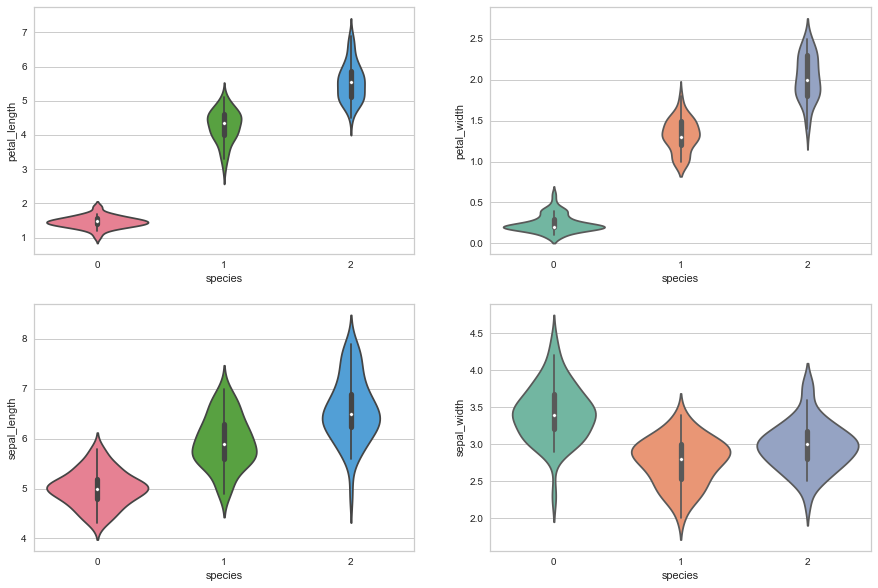

In [43]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris,palette='husl')
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris, palette='Set2')
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris,palette='husl')
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris,palette='Set2')
plt.show()

## Heatmap

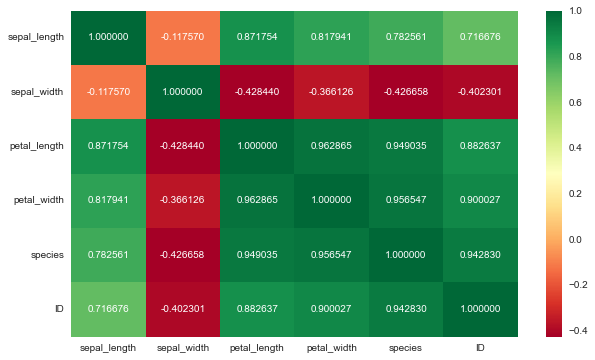

In [45]:
plt.figure(figsize=(10,6)) 
sns.heatmap(iris.corr(),annot=True,fmt="f",cmap="RdYlGn")
plt.show()

In [46]:
iris.drop('species', axis =1, inplace = True)

In [47]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,4
4,5.0,3.6,1.4,0.2,5


In [48]:
feature = iris.columns[:4]
for i in enumerate(feature):
    print(i)

(0, 'sepal_length')
(1, 'sepal_width')
(2, 'petal_length')
(3, 'petal_width')


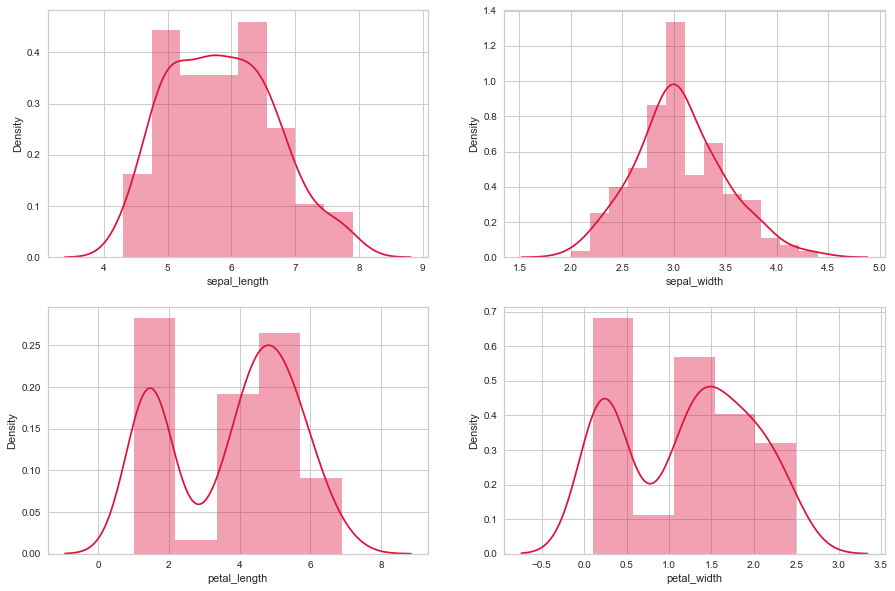

In [49]:
plt.figure(figsize = (15,10))
feature = iris.columns[:4]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.distplot(iris[i[1]],color='crimson')

## Outlier Check

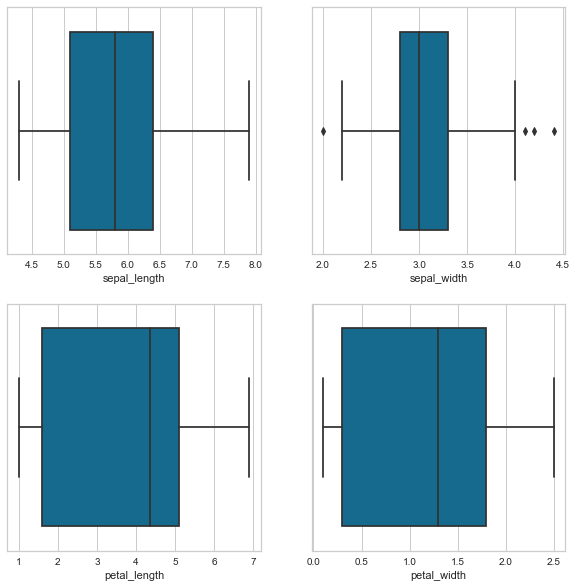

In [51]:
plt.figure(figsize = (10,10))
feature = iris.columns[:-1]
for i in enumerate(feature):
    plt.subplot(2,2, i[0]+1)
    sns.boxplot(iris[i[1]])

In [52]:
iris.drop('ID', axis =1, inplace = True)

### Finding the Optimal Number of Clusters for KMeans Clustering

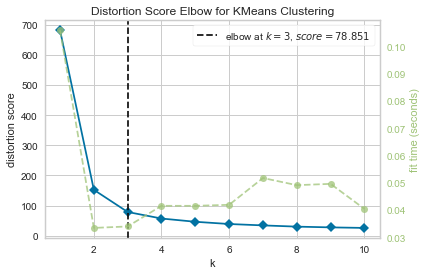

In [54]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(iris) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

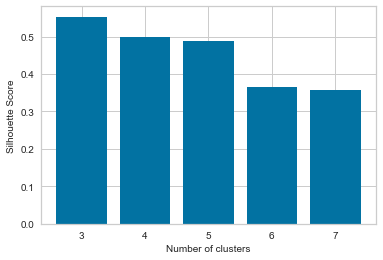

In [61]:
silhouette_scores = [] 

for n_cluster in range(3, 8):
    silhouette_scores.append( 
        silhouette_score(iris, KMeans(n_clusters = n_cluster).fit_predict(iris))) 
    
# Plotting a bar graph to compare the results 
k = [3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### instatiate KMeans class and set the number of clusters

In [62]:
km_model = KMeans(n_clusters=3, random_state=10)
km = km_model.fit_predict(X)
centroids = km_model.cluster_centers_ 
labels = km_model.labels_ 

In [64]:
X = iris.iloc[:, 0:4].values

## Visualization of clustered Data

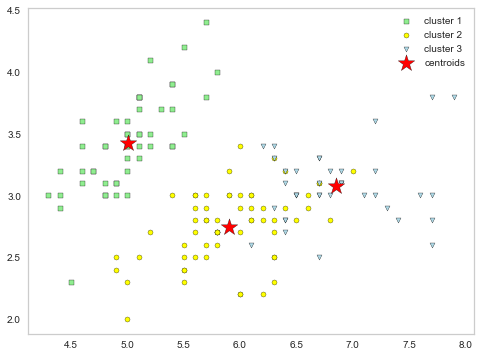

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Evaluation

In [72]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(target, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 89.33%


## Checking Some Other Measures

In [74]:
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(target, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 88.67%
The purity score for squared euclidean distance is 88.67%
The purity score for manhattan distance is 88.67%
The purity score for chebyshev distance is 88.67%
The purity score for canberra distance is 95.33%
The purity score for chi-square distance is 96.0%


## Choosing Optimal Cluster Number

In [76]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
x = iris.iloc[:, [0, 1, 2 , 3]].values
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [77]:
df_kmean = iris.copy()

In [78]:
label  = pd.DataFrame(y_kmeans, columns= ['label'])
label.head()

,label
0,1
1,1
2,1
3,1
4,1


In [79]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [80]:
df_kmean.label.value_counts()

0    62
1    50
2    38
Name: label, dtype: int64

In [81]:
listt = [x for x in range(1,151)]
index = pd.DataFrame(listt)
df_kmean['ID'] = index

### Making sense out of the clsuters

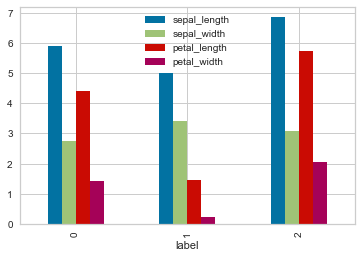

In [84]:
df_kmean.drop('ID', axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()

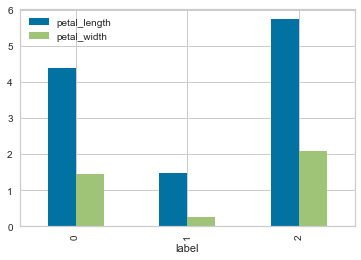

In [85]:
df_kmean.drop(['ID', 'sepal_length', 'sepal_width'], axis = 1).groupby('label').mean().plot(kind = 'bar')
plt.show()